# **Stock Price Prediction and Portfolio Optimization**

In [4]:
# Import modules

import os
import pathlib

import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Dataset directory path
dataset_dir_path = "/content/drive/MyDrive/stock_dataset"

# Load the CSV files into separate DataFrames
aapl_df = pd.read_csv(os.path.join(dataset_dir_path, 'AAPL.csv'))
msft_df = pd.read_csv(os.path.join(dataset_dir_path, 'MSFT.csv'))
nvda_df = pd.read_csv(os.path.join(dataset_dir_path, 'NVDA.csv'))


In [7]:
aapl_df.head()

,Date,Low,Open,Volume,High,Close,Adjusted Close
0,12-12-1980,0.128348,0.128348,469033600,0.128906,0.128348,0.099874
1,15-12-1980,0.121652,0.122210,175884800,0.122210,0.121652,0.094663
2,16-12-1980,0.112723,0.113281,105728000,0.113281,0.112723,0.087715
3,17-12-1980,0.115513,0.115513,86441600,0.116071,0.115513,0.089886
4,18-12-1980,0.118862,0.118862,73449600,0.119420,0.118862,0.092492


In [ ]:
msft_df.head()

,Date,Low,Open,Volume,High,Close,Adjusted Close
0,13-03-1986,0.088542,0.088542,1031788800,0.101563,0.097222,0.061608
1,14-03-1986,0.097222,0.097222,308160000,0.102431,0.100694,0.063809
2,17-03-1986,0.100694,0.100694,133171200,0.103299,0.102431,0.064909
3,18-03-1986,0.098958,0.102431,67766400,0.103299,0.099826,0.063258
4,19-03-1986,0.097222,0.099826,47894400,0.100694,0.098090,0.062158


In [ ]:
nvda_df.head()

,Date,Low,Open,Volume,High,Close,Adjusted Close
0,22-01-1999,0.388021,0.437500,271468800,0.488281,0.410156,0.376886
1,25-01-1999,0.410156,0.442708,51048000,0.458333,0.453125,0.416370
2,26-01-1999,0.411458,0.458333,34320000,0.467448,0.417969,0.384065
3,27-01-1999,0.395833,0.419271,24436800,0.429688,0.416667,0.382869
4,28-01-1999,0.412760,0.416667,22752000,0.419271,0.415365,0.381673


### Check missing values

In [8]:
# Function to check missing values in Dataframe
def check_missing_values(df, stock_name):
  print(f"Missing values in {stock_name}:")
  print(df.isnull().sum())

In [9]:
check_missing_values(aapl_df, 'AAPL')

Missing values in AAPL:
Date              0
Low               0
Open              0
Volume            0
High              0
Close             0
Adjusted Close    0
dtype: int64


In [ ]:
check_missing_values(msft_df, 'MSFT')

Missing values in MSFT:
Date              0
Low               0
Open              0
Volume            0
High              0
Close             0
Adjusted Close    0
dtype: int64


In [ ]:
check_missing_values(nvda_df, 'NVDA')

Missing values in NVDA:
Date              0
Low               0
Open              0
Volume            0
High              0
Close             0
Adjusted Close    0
dtype: int64


### Closing price plot of stocks

In [10]:
# Convert 'Date' columns to datetime
aapl_df['Date'] = pd.to_datetime(aapl_df['Date'], dayfirst=True)
msft_df['Date'] = pd.to_datetime(msft_df['Date'], dayfirst=True)
nvda_df['Date'] = pd.to_datetime(nvda_df['Date'], dayfirst=True)


In [11]:
# Set plot style
plt.style.use('ggplot')

In [12]:
# Function to plot close price
def plot_close_price(df, stock_name, full_name):
  plt.figure(figsize=(12, 5))
  plt.plot(df['Date'], df['Close'], label='Close Price', color='blue')
  plt.title(f"{full_name} (Ticker: {stock_name}) - Close Price Over Time", fontsize=14)
  plt.xlabel("Date")
  plt.ylabel("Close Price (USD)")
  plt.legend()
  plt.tight_layout()
  plt.show()

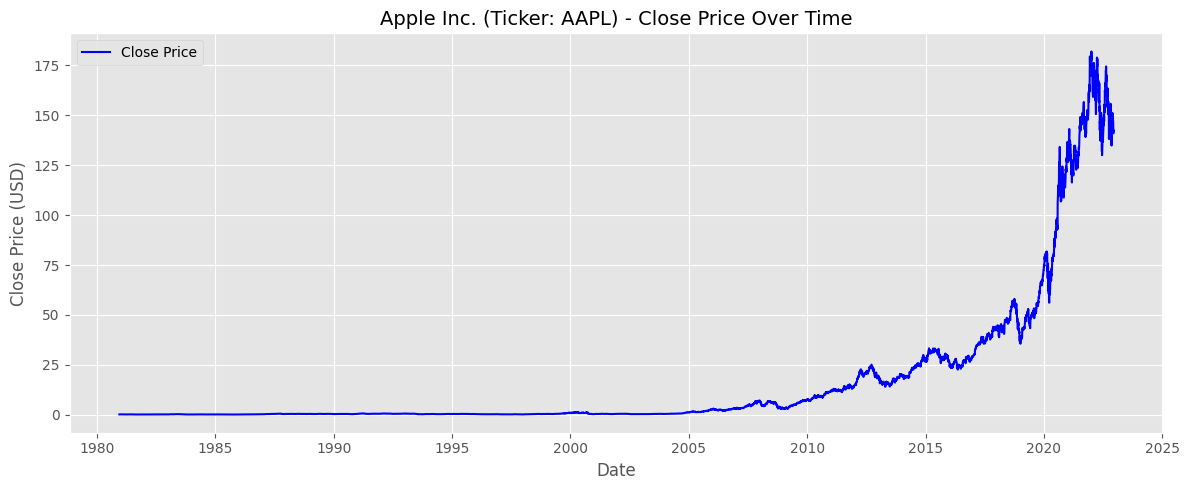

In [13]:
# Call above defined function to show close price plot
plot_close_price(aapl_df, 'AAPL', 'Apple Inc.')

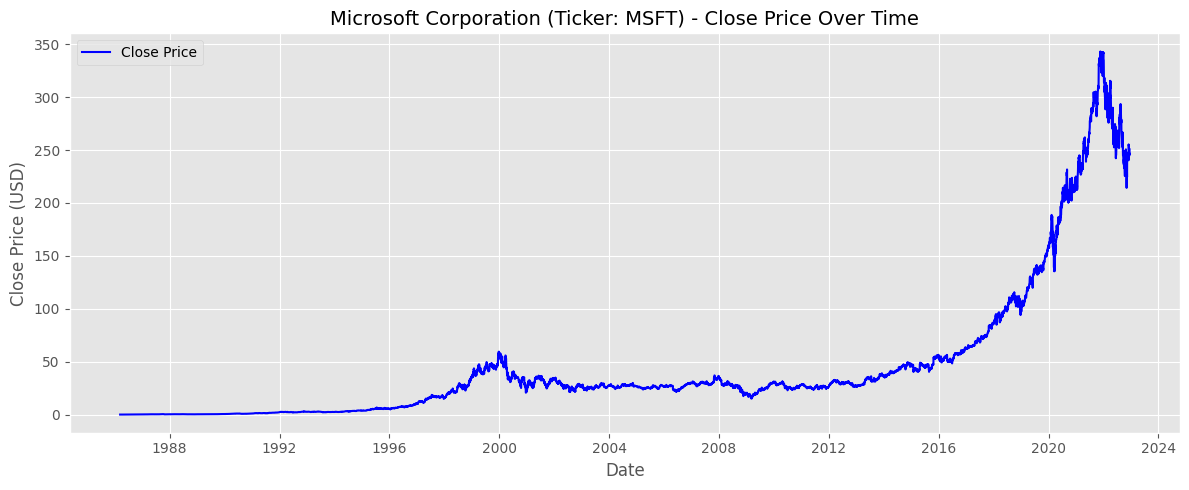

In [14]:
plot_close_price(msft_df, 'MSFT', 'Microsoft Corporation')

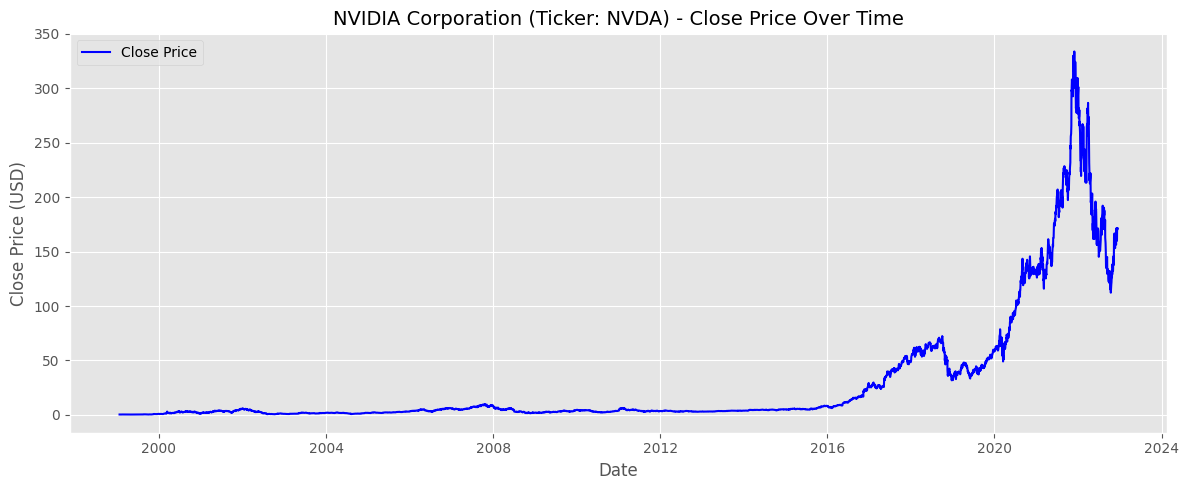

In [ ]:
plot_close_price(nvda_df, 'NVDA', 'NVIDIA Corporation')

Apple Inc. (AAPL): 10590
Microsoft Corp. (MSFT): 9264
NVIDIA Corp. (NVDA): 6013


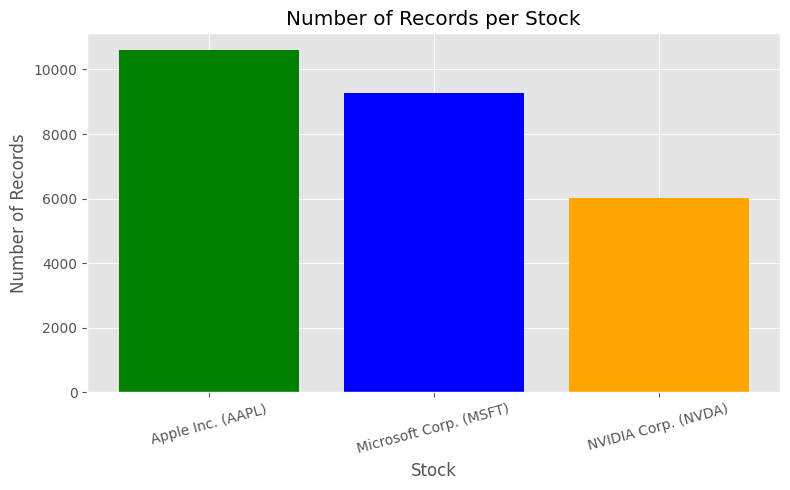

In [15]:
# Calculate total number of records
records_count = {
    'Apple Inc. (AAPL)': len(aapl_df),
    'Microsoft Corp. (MSFT)': len(msft_df),
    'NVIDIA Corp. (NVDA)': len(nvda_df),
}

# Print counted records
print("\n".join(f"{stock}: {count}" for stock, count in records_count.items()))


# Plot as a bar chart
plt.figure(figsize=(8, 5))
plt.bar(records_count.keys(), records_count.values(),
        color=['green', 'blue', 'orange'])
plt.title("Number of Records per Stock")
plt.xlabel('Stock')
plt.ylabel('Number of Records')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


### Merging the three stock files into one

In [16]:
# Add 'Symbol' column to each Dataframe
aapl_df['Symbol'] = 'AAPL'
msft_df['Symbol'] = 'MSFT'
nvda_df['Symbol'] = 'NVDA'

# Concatenate all DataFrames into one
merged_df = pd.concat([aapl_df, msft_df, nvda_df], ignore_index=True)

merged_df


,Date,Low,Open,Volume,High,Close,Adjusted Close,Symbol
0,1980-12-12,0.128348,0.128348,469033600,0.128906,0.128348,0.099874,AAPL
1,1980-12-15,0.121652,0.122210,175884800,0.122210,0.121652,0.094663,AAPL
2,1980-12-16,0.112723,0.113281,105728000,0.113281,0.112723,0.087715,AAPL
3,1980-12-17,0.115513,0.115513,86441600,0.116071,0.115513,0.089886,AAPL
4,1980-12-18,0.118862,0.118862,73449600,0.119420,0.118862,0.092492,AAPL
...,...,...,...,...,...,...,...,...
25862,2022-12-06,158.190002,165.300003,35269400,165.729996,159.869995,159.869995,NVDA
25863,2022-12-07,156.669998,157.720001,37238800,161.860001,161.199997,161.199997,NVDA
25864,2022-12-08,159.589996,162.729996,51545600,171.789993,171.690002,171.690002,NVDA
25865,2022-12-09,169.750000,171.600006,46509500,175.830002,170.009995,170.009995,NVDA


### Extracting Technical Indicator (Features)

In [17]:
!pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=e3d62e06d5ddcd38a90b1d9d96e7e5ea0ec35d550dd4bda89f983907012421ea
  Stored in directory: /root/.cache/pip/wheels/a1/d7/29/7781cc5eb9a3659d032d7d15bdd0f49d07d2b24fec29f44bc4
Successfully built ta


In [18]:
from ta.volatility import AverageTrueRange, BollingerBands
from ta.trend import MACD, ADXIndicator
from ta.momentum import RSIIndicator, StochasticOscillator, ROCIndicator
from ta.trend import EMAIndicator, CCIIndicator
from ta.volume import OnBalanceVolumeIndicator, VolumePriceTrendIndicator, MFIIndicator
from ta.volatility import KeltnerChannel

In [19]:
# Sort the data by date for each symbol
df_sd = merged_df.sort_values(by=['Symbol', 'Date'])

# Initialize new columns for technical indicators
df_sd['RSI'] = df_sd.groupby('Symbol')['Close'].transform(lambda x: RSIIndicator(x, window=14).rsi())
df_sd['MV20'] = df_sd.groupby('Symbol')['Close'].transform(lambda x: x.rolling(window=20).mean())
df_sd['MV50'] = df_sd.groupby('Symbol')['Close'].transform(lambda x: x.rolling(window=50).mean())
df_sd['MV200'] = df_sd.groupby('Symbol')['Close'].transform(lambda x: x.rolling(window=200).mean())

macd = df_sd.groupby('Symbol')['Close'].apply(lambda x: MACD(x).macd())
df_sd['MACD'] = macd.reset_index(level=0, drop=True)

adx = df_sd.groupby('Symbol').apply(lambda x: ADXIndicator(x['High'], x['Low'], x['Close']).adx())
df_sd['ADX'] = adx.reset_index(level=0, drop=True)



/tmp/ipython-input-19-797530503.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  adx = df_sd.groupby('Symbol').apply(lambda x: ADXIndicator(x['High'], x['Low'], x['Close']).adx())


In [20]:
# Manually calculate the Accumulation/Distrbution (AD) line
def calculate_ad(high, low, close, volume):
  clv = ((close - low) - (high - close)) / (high - low)
  clv = clv.fillna(0)
  return (clv * volume).cumsum() # AD

df_sd['AD'] = df_sd.groupby('Symbol').apply(
    lambda x: calculate_ad(x['High'], x['Low'], x['Close'], x['Volume'])
    ).reset_index(level=0, drop=True)



/tmp/ipython-input-20-150922537.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_sd['AD'] = df_sd.groupby('Symbol').apply(


In [21]:
# Bollinger Bands
bollinger = df_sd.groupby('Symbol')['Close'].apply(lambda x: BollingerBands(close=x).bollinger_mavg())
df_sd['Bollinger_MAVG'] = bollinger.reset_index(level=0, drop=True)
df_sd['Bollinger_High'] = df_sd.groupby('Symbol')['Close'].transform(lambda x: BollingerBands(close=x).bollinger_hband())
df_sd['Bollinger_Low'] = df_sd.groupby('Symbol')['Close'].transform(lambda x: BollingerBands(close=x).bollinger_lband())

# Stochastic Oscillator
stochastic = df_sd.groupby('Symbol').apply(lambda x: StochasticOscillator(x['High'], x['Low'], x['Close']).stoch())
df_sd['Stochastic'] = stochastic.reset_index(level=0, drop=True)

# Rate of Change (ROC)
roc = df_sd.groupby('Symbol')['Close'].apply(lambda x: ROCIndicator(x).roc())
df_sd['ROC'] = roc.reset_index(level=0, drop=True)


/tmp/ipython-input-21-571243082.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stochastic = df_sd.groupby('Symbol').apply(lambda x: StochasticOscillator(x['High'], x['Low'], x['Close']).stoch())


In [22]:
# Drop rows with NaN values generated by technical indicators
df_sd = df_sd.dropna(subset=['RSI', 'MV20', 'MV50', 'MV200', 'MACD', 'ADX', 'AD'])

# Compute Stochastic Oscillator
df_sd['stoch'] = StochasticOscillator(high=df_sd['High'], low=df_sd['Low'], close=df_sd['Close'], window=14).stoch()

# Compute ROC (Rate of Change)
df_sd['roc'] = ROCIndicator(close=df_sd['Close'], window=14).roc()

/tmp/ipython-input-22-514623917.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sd['stoch'] = StochasticOscillator(high=df_sd['High'], low=df_sd['Low'], close=df_sd['Close'], window=14).stoch()
/tmp/ipython-input-22-514623917.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sd['roc'] = ROCIndicator(close=df_sd['Close'], window=14).roc()


In [23]:
# Compute Exponential Moving Average (EMA)
df_sd['ema_20'] = EMAIndicator(close=df_sd['Close'], window=20).ema_indicator()
df_sd['ema_50'] = EMAIndicator(close=df_sd['Close'], window=50).ema_indicator()

# Compute On-Balance Volume (OBV)
df_sd['obv'] = OnBalanceVolumeIndicator(close=df_sd['Close'], volume=df_sd['Volume']).on_balance_volume()

# Computer Volume Price Trend (VPT)
df_sd['vpt'] = VolumePriceTrendIndicator(close=df_sd['Close'], volume=df_sd['Volume']).volume_price_trend()

# Compute Commodity Channel Index (CCI)
df_sd['cci'] = CCIIndicator(high=df_sd['High'], low=df_sd['Low'], close=df_sd['Close'], window=20).cci()

# Compute Money Flow Index (MFI)
df_sd['mfi'] = MFIIndicator(high=df_sd['High'], low=df_sd['Low'], close=df_sd['Close'], volume=df_sd['Volume'], window=14).money_flow_index()

# Compute Keltner Channel
indicator_kc = KeltnerChannel(high=df_sd['High'], low=df_sd['Low'], close=df_sd['Close'], window=20)
df_sd['kc_middle'] = indicator_kc.keltner_channel_mband()
df_sd['kc_upper'] = indicator_kc.keltner_channel_hband()
df_sd['kc_lower'] = indicator_kc.keltner_channel_lband()


In [24]:
df_sd

,Date,Low,Open,Volume,High,Close,Adjusted Close,Symbol,RSI,MV20,...,roc,ema_20,ema_50,obv,vpt,cci,mfi,kc_middle,kc_upper,kc_lower
199,1981-09-28,0.064174,0.064174,91728000,0.064732,0.064174,0.049937,AAPL,19.460647,0.082701,...,NaN,NaN,NaN,91728000,NaN,NaN,NaN,NaN,0.064918,0.063802
200,1981-09-29,0.067522,0.067522,94684800,0.068080,0.067522,0.052542,AAPL,27.078626,0.081585,...,NaN,NaN,NaN,186412800,4.939769e+06,NaN,NaN,NaN,0.066592,0.065476
201,1981-09-30,0.068080,0.068080,49996800,0.068638,0.068080,0.052976,AAPL,28.295966,0.080218,...,NaN,NaN,NaN,236409600,5.352944e+06,NaN,NaN,NaN,0.067336,0.066220
202,1981-10-01,0.068080,0.068080,61129600,0.068638,0.068080,0.052976,AAPL,28.295966,0.078767,...,NaN,NaN,NaN,297539200,5.352944e+06,NaN,NaN,NaN,0.067708,0.066592
203,1981-10-02,0.073661,0.073661,45046400,0.074219,0.073661,0.057319,AAPL,39.928389,0.077846,...,NaN,NaN,NaN,342585600,9.045716e+06,NaN,NaN,NaN,0.069047,0.067931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25862,2022-12-06,158.190002,165.300003,35269400,165.729996,159.869995,159.869995,NVDA,54.437142,159.776501,...,-4.074168,157.975674,149.683927,258082741210,5.260845e+09,23.162826,32.630062,159.331667,166.079166,152.584168
25863,2022-12-07,156.669998,157.720001,37238800,161.860001,161.199997,161.199997,NVDA,55.462150,160.535500,...,1.319919,158.282753,150.135538,258119980010,5.261155e+09,-1.860691,34.200920,160.042334,166.711833,153.372835
25864,2022-12-08,159.589996,162.729996,51545600,171.789993,171.690002,171.690002,NVDA,62.607295,162.232001,...,9.517126,159.559633,150.980811,258171525610,5.264509e+09,103.834111,44.768697,161.469167,168.522666,154.415668
25865,2022-12-09,169.750000,171.600006,46509500,175.830002,170.009995,170.009995,NVDA,60.921621,162.857500,...,10.331623,160.554906,151.727053,258125016110,5.264054e+09,153.436932,53.413758,162.384000,169.128500,155.639501


In [25]:
# Import module
import seaborn as sns

### Checking Correlation of Features with Close


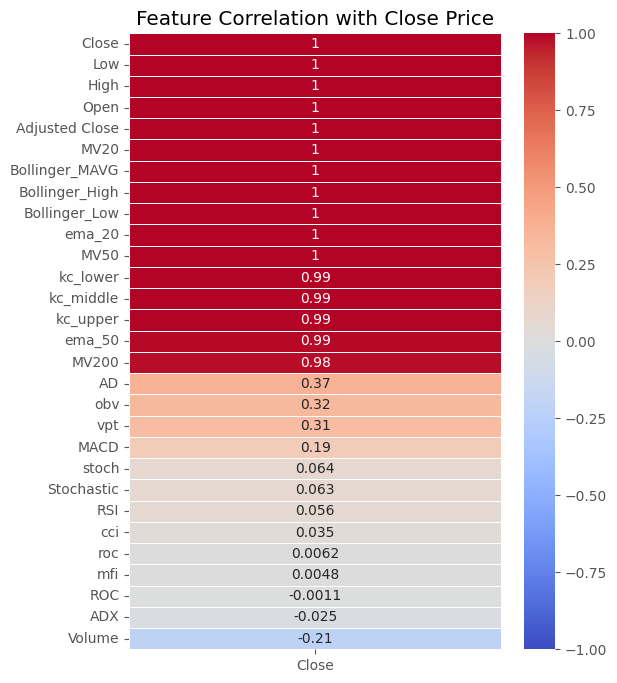

In [26]:
# Compute correlation matrix (numeric columns only)
correlation_matrix = df_sd.corr(numeric_only=True)

# Extract only correlations with 'Close'
close_corr = correlation_matrix[['Close']].sort_values(by='Close', ascending=False)

# Plot correlation heatmap
plt.figure(figsize=(6, 8))
sns.heatmap(close_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Feature Correlation with Close Price')
plt.show()

### Removing High Correlation Features

In [27]:
# Get absolute correlation with 'Close'
abs_corr_with_close = correlation_matrix['Close'].abs()

# Identify features with strong correlation (excluding 'Close' itself)
strong_corr_features = abs_corr_with_close[abs_corr_with_close > 0.75].index
strong_corr_features = strong_corr_features.drop('Close') # Don't drop the target

print(f"Features to drop (|correlation| > 0.75 with 'Close'):\n", list(strong_corr_features))

# Drop these features from the DataFrame
df_sd_filterd = df_sd.drop(columns=strong_corr_features)


Features to drop (|correlation| > 0.75 with 'Close'):
 ['Low', 'Open', 'High', 'Adjusted Close', 'MV20', 'MV50', 'MV200', 'Bollinger_MAVG', 'Bollinger_High', 'Bollinger_Low', 'ema_20', 'ema_50', 'kc_middle', 'kc_upper', 'kc_lower']


### Handling Missing Values

In [28]:
# Check for missing values
missing_counts = df_sd_filterd.isnull().sum()
print("Missing values per column:\n", missing_counts)

# Total missing values in the entire DataFrame
total_missing = df_sd_filterd.isnull().sum().sum()
print(f"\nTotal missing values: {total_missing}")


Missing values per column:
 Date           0
Volume         0
Close          0
Symbol         0
RSI            0
MACD           0
ADX            0
AD             0
Stochastic     0
ROC            0
stoch         13
roc           14
obv            0
vpt            1
cci           19
mfi           13
dtype: int64

Total missing values: 60


### Drop rows with any missing values from filtered dataframe

In [29]:
df_sd_filtered_cleaned = df_sd_filterd.dropna()

# Confirm removal
print(f"\nNew shape after dropping rows with missing values: {df_sd_filtered_cleaned.shape}")


New shape after dropping rows with missing values: (25251, 16)


In [30]:
# Check columns
df_sd_filtered_cleaned.columns

Index(['Date', 'Volume', 'Close', 'Symbol', 'RSI', 'MACD', 'ADX', 'AD',
       'Stochastic', 'ROC', 'stoch', 'roc', 'obv', 'vpt', 'cci', 'mfi'],
      dtype='object')

### # Label Encode Symbol Feature

In [31]:
# Import modules
from sklearn.preprocessing import LabelEncoder
import joblib  # for saving the encoder

In [32]:
# Label encode the 'Symbol' column
le = LabelEncoder()
df_sd_filtered_cleaned['Symbol'] = le.fit_transform(df_sd_filtered_cleaned['Symbol'])

/tmp/ipython-input-32-1338076489.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sd_filtered_cleaned['Symbol'] = le.fit_transform(df_sd_filtered_cleaned['Symbol'])


In [33]:
# Save the encoder to a file
joblib.dump(le, f'{dataset_dir_path}/label_encoder_symbol.pkl')

['/content/drive/MyDrive/stock_dataset/label_encoder_symbol.pkl']

In [34]:
# Check the result
print("Encoded Symbol classes:", dict(zip(le.classes_, le.transform(le.classes_))))
df_sd_filtered_cleaned.head(5)

Encoded Symbol classes: {'AAPL': np.int64(0), 'MSFT': np.int64(1), 'NVDA': np.int64(2)}


,Date,Volume,Close,Symbol,RSI,MACD,ADX,AD,Stochastic,ROC,stoch,roc,obv,vpt,cci,mfi
218,1981-10-23,27910400,0.084821,0,54.147460,0.001125,21.001005,-7.677734e+09,73.907287,6.293318,73.907287,11.763932,588336000,1.454367e+07,59.097343,64.894849
219,1981-10-26,27283200,0.084821,0,54.147460,0.001139,20.158569,-7.705018e+09,59.992862,2.702539,59.992862,12.591753,615619200,1.454367e+07,55.723898,68.937538
220,1981-10-27,85590400,0.086496,0,56.980816,0.001270,19.894983,-7.790608e+09,76.926316,4.027814,76.926316,8.392344,701209600,1.623387e+07,76.486943,72.405876
221,1981-10-28,44172800,0.089286,0,61.273411,0.001582,20.123175,-7.834781e+09,93.750662,3.895832,93.750662,8.108827,745382400,1.765870e+07,112.753530,73.355084
222,1981-10-29,30486400,0.088170,0,58.748200,0.001718,19.975162,-7.865267e+09,81.252070,2.597222,81.252070,6.041111,714896000,1.727764e+07,92.902881,65.010346


### Split the Data into Training and Test

In [35]:
# Import module
from sklearn.model_selection import train_test_split

In [36]:
# Save the date column
dates = df_sd_filtered_cleaned['Date']

# Define features and target
X = df_sd_filtered_cleaned.drop(columns=['Close', 'Date']) # All except 'Close'
y = df_sd_filtered_cleaned['Close'] # Target is 'Close'

# Split the dataset
X_train, X_test, y_train, y_test, dates_train, dates_test = train_test_split(
    X, y, dates, test_size=0.2, random_state=42, shuffle=True
)

# Confirm shapes
print(f"x_train shape: {X_train.shape}")
print(f"x_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


x_train shape: (20200, 14)
x_test shape: (5051, 14)
y_train shape: (20200,)
y_test shape: (5051,)


## XGBOOST MODEL

In [37]:
# Import modules
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

In [38]:
# Define the parameter grid
param_grid = {
    'n_estimators': [2,5,10,20],
    'learning_rate': [0.01, 0.1, 0.2]
}

### Model Traning

In [39]:
# Initialize XGBoost regressor
xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

# Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           verbose=1, n_jobs=1)

# Fit the model
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             n_jobs=1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'n_estimators': [2, 5, 10, 20]},
             scoring='neg_mean_squared_error', verbose=1)

In [40]:
# Best parameters from grid search
print(f"✅ Best Hyperparameters Found:")
print(grid_search.best_params_)

✅ Best Hyperparameters Found:
{'learning_rate': 0.2, 'n_estimators': 20}


### Making Prediction

In [41]:
# Get best parameters and evaluate on test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

### Evaluation Matrix Result of the Model

In [42]:
# Import modules
import numpy as np
from sklearn.metrics import (mean_absolute_error, mean_squared_error,
                             r2_score, mean_absolute_percentage_error,
                             median_absolute_error)

In [57]:
# Compute evaluation metrics
mean_abs_err = mean_absolute_error(y_test, y_pred)

mean_sq_err = mean_squared_error(y_test, y_pred)

r_mean_sq_err = np.sqrt(mean_sq_err)

r2 = r2_score(y_test, y_pred)

mean_abs_perc_err = mean_absolute_percentage_error(y_test, y_pred)

# Displaying results
print("Evaluation Metrics:")
print(f"Mean Absolute Error: {mean_abs_err:.4f}")
print(f"Mean Squared Error:  {mean_sq_err:.4f}")
print(f"Root Mean Squared Error: {r_mean_sq_err:.4f}")
print(f"R² (Coefficient of Determination: {r2:.4f}")
print(f"Mean Absolute Percentage Error: {mean_abs_perc_err:.4f}")



Evaluation Metrics:
Mean Absolute Error: 2.8529
Mean Squared Error:  35.7730
Root Mean Squared Error: 5.9811
R² (Coefficient of Determination: 0.9882
Mean Absolute Percentage Error: 0.6945


In [58]:
# Add predictions and true values to a new DataFrame
result_df = X_test.copy()
result_df['Actual_Close'] = y_test.values
result_df['Predicted_Close'] = y_pred
result_df['Date'] = dates_test.values

# Map encoded values back to stock names using the saved LabelEncoder
result_df['Symbol_Name'] = le.inverse_transform(result_df['Symbol'])


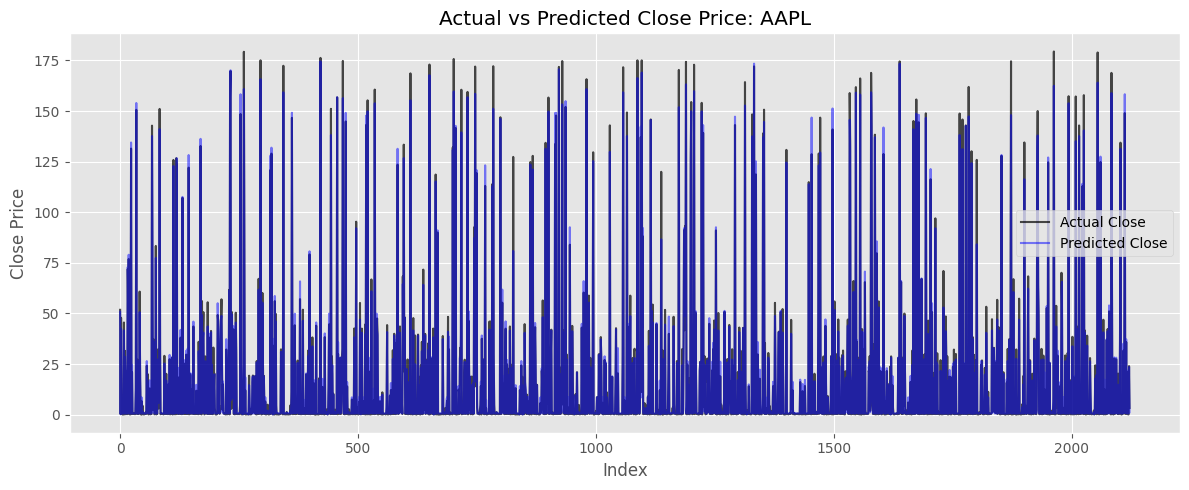

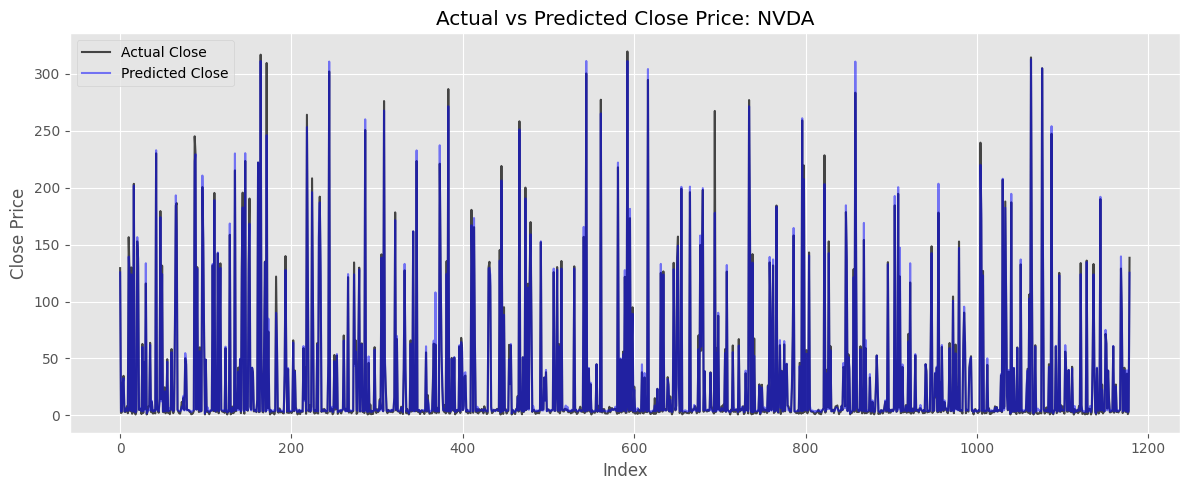

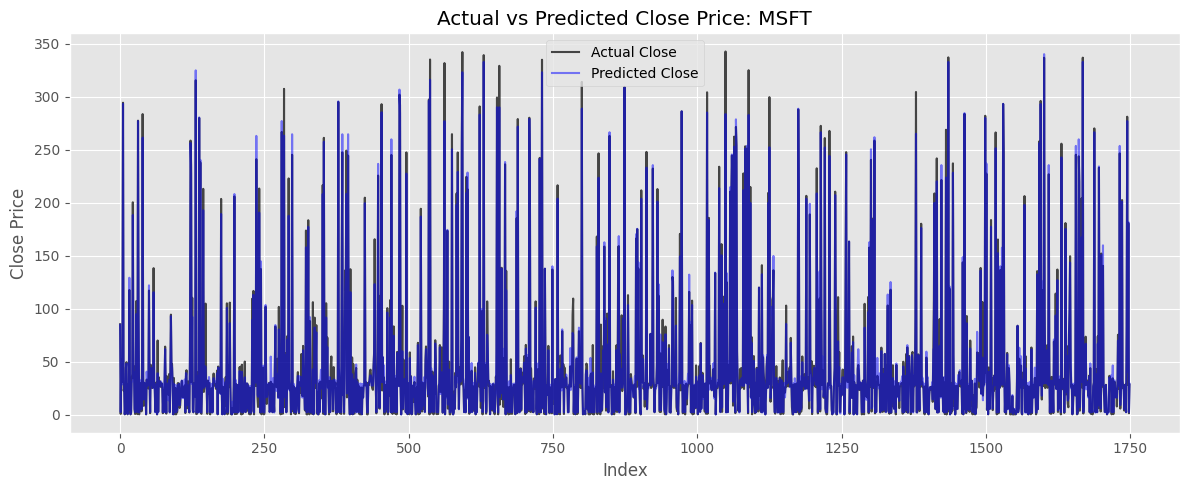

In [64]:
# Plot actual vs predicted for each stock
unique_symbols = result_df['Symbol_Name'].unique()

for symbol in unique_symbols:
  stock_data = result_df[result_df['Symbol_Name'] == symbol]

  plt.figure(figsize=(12, 5))

  plt.plot(stock_data['Actual_Close'].values, label='Actual Close',
           color='black', alpha=0.7)

  plt.plot(stock_data['Predicted_Close'].values, label='Predicted Close',
           color='blue', alpha=0.5)

  plt.title(f"Actual vs Predicted Close Price: {symbol}")
  plt.xlabel("Index")
  plt.ylabel("Close Price")
  plt.legend()
  plt.grid(True)
  plt.tight_layout()
  plt.show()


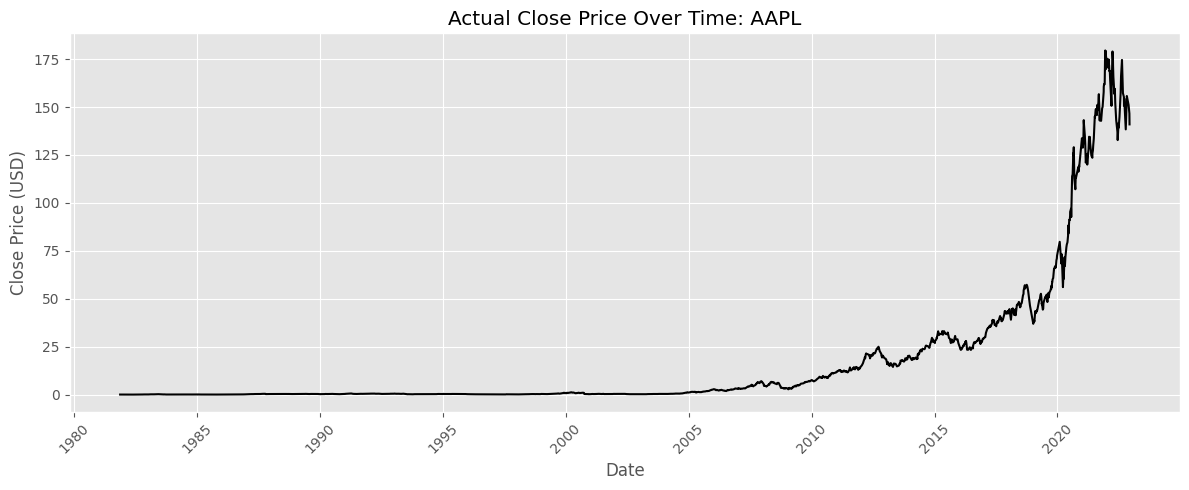

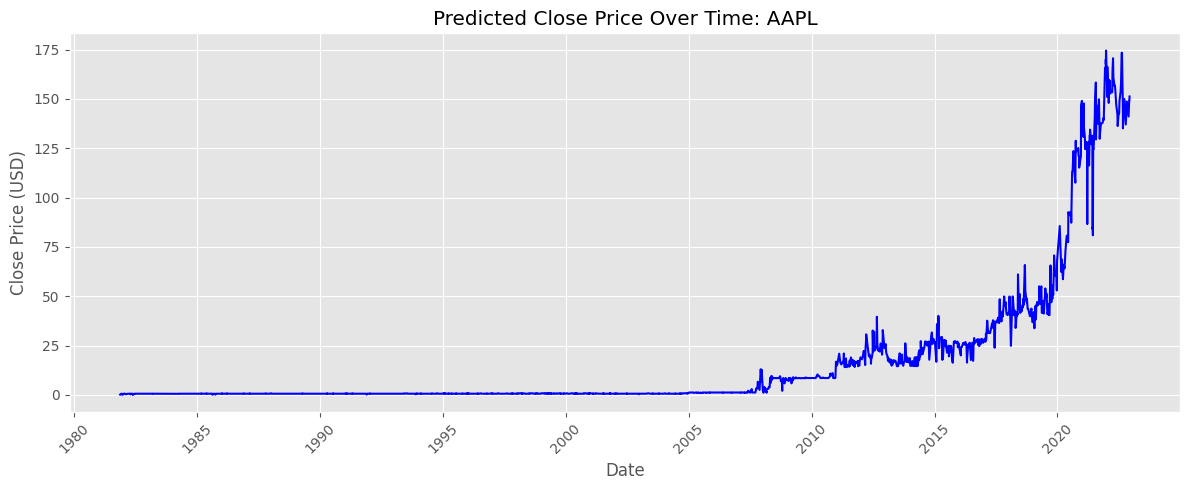

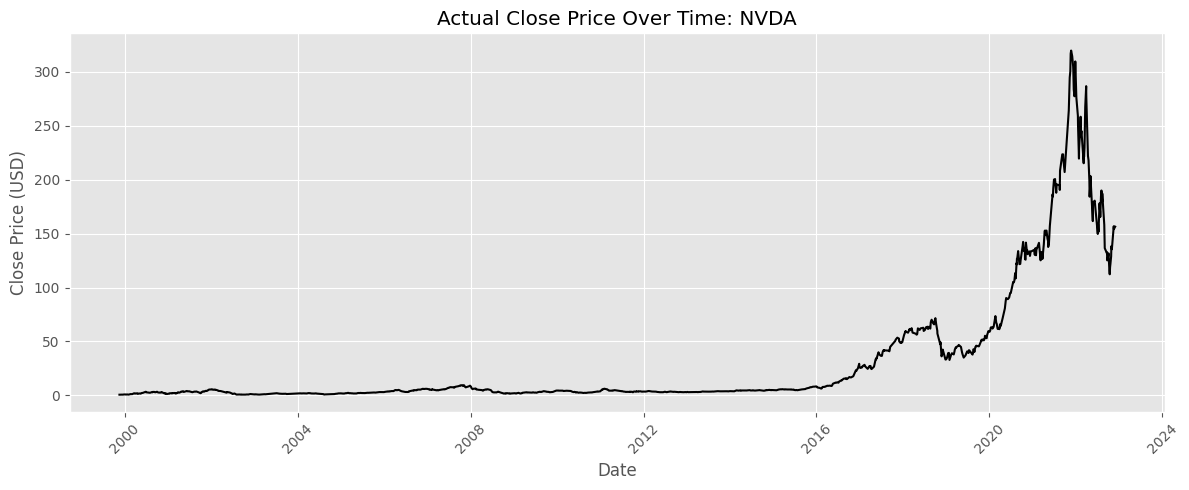

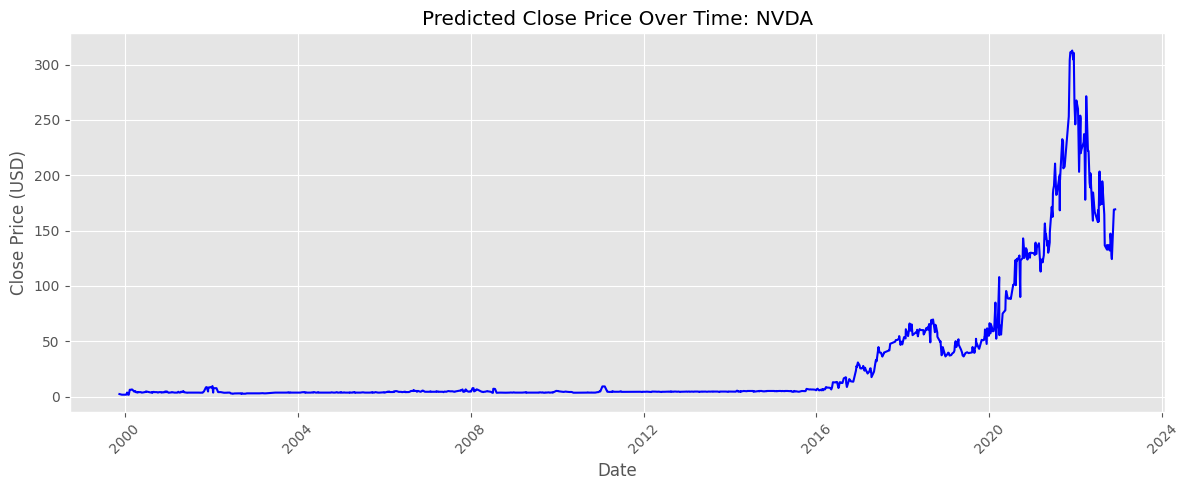

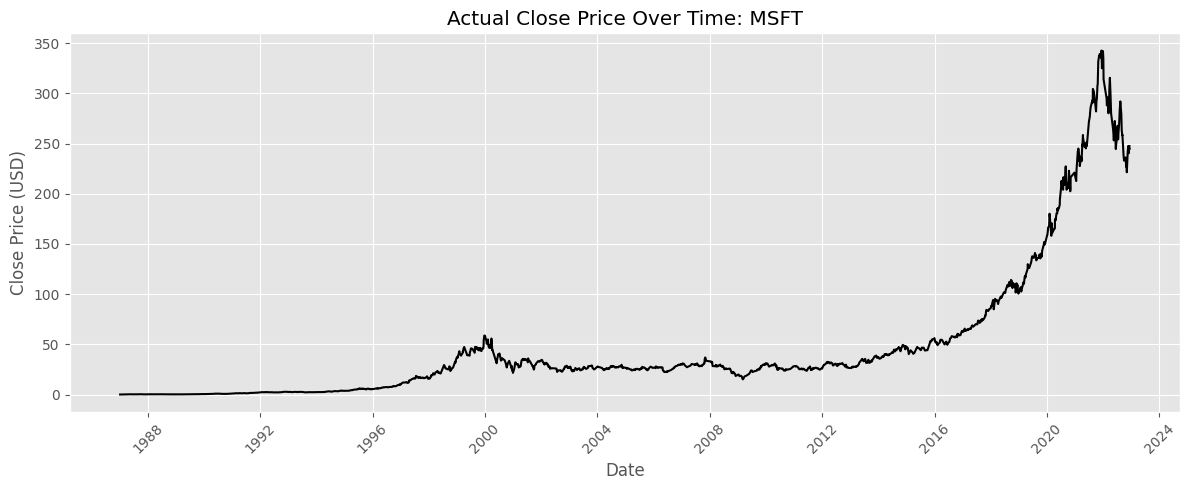

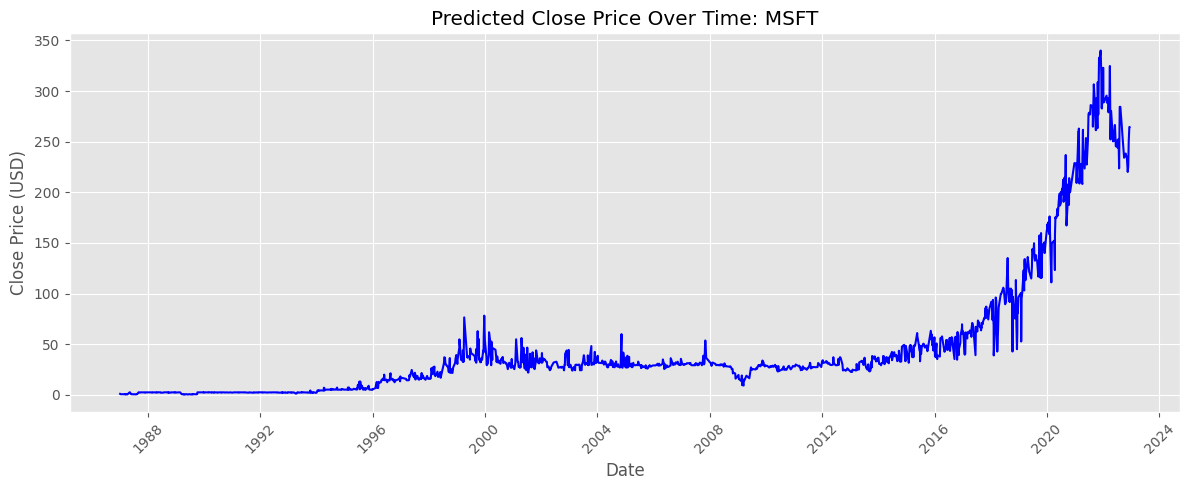

In [46]:
# Get unique stock symbols
unique_symbols = result_df['Symbol_Name'].unique()

# Loop through each symbol and create two separate plots
for symbol in unique_symbols:
  stock_data = result_df[result_df['Symbol_Name'] == symbol].sort_values(by='Date')

  # Plot actual close price
  plt.figure(figsize=(12, 5))
  plt.plot(stock_data['Date'], stock_data['Actual_Close'], label='Actual Close', color='black')
  plt.title(f'Actual Close Price Over Time: {symbol}')
  plt.xlabel('Date')
  plt.ylabel('Close Price (USD)')
  plt.xticks(rotation=45)
  plt.grid(True)
  plt.tight_layout()
  plt.show()

  # Plot predicted close price
  plt.figure(figsize=(12, 5))
  plt.plot(stock_data['Date'], stock_data['Predicted_Close'], label='Predicted Close', color='blue')
  plt.title(f'Predicted Close Price Over Time: {symbol}')
  plt.xlabel('Date')
  plt.ylabel('Close Price (USD)')
  plt.xticks(rotation=45)
  plt.grid(True)
  plt.tight_layout()
  plt.show()


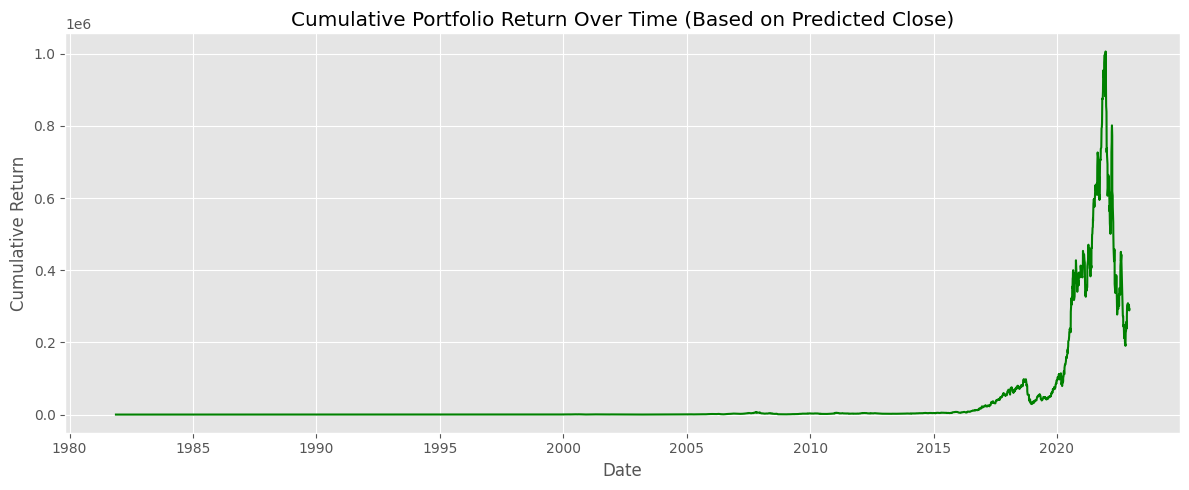

In [47]:
# Sort by Symbol and Date
result_df.sort_values(['Symbol_Name', 'Date'], inplace=True)

# Calculate Today's Predicted Return
result_df['Predicted_Return'] = (result_df['Predicted_Close'] - result_df['Actual_Close']) / result_df['Actual_Close']
result_df['Predicted_Return'] = result_df['Predicted_Return'].clip(lower=-1, upper=1)

# Calculate NEXT DAY actual return (based on what actually happened after you would've traded)
result_df['Actual_Close_Next'] = result_df.groupby('Symbol_Name')['Actual_Close'].shift(-1)
result_df['Actual_Return_Next'] = (result_df['Actual_Close_Next'] - result_df['Actual_Close']) / result_df['Actual_Close']

# Drop rows where next day's return is NaN (last row of each group)
result_df.dropna(subset=['Actual_Return_Next'], inplace=True)

# Normalize weights based on predicted return for each day
result_df['Weight'] = result_df.groupby('Date')['Predicted_Return'].transform(lambda x: np.exp(x) / np.exp(x).sum())

# Compute weighted return (what your portfolio earns that day based on yesterday's weights)
result_df['Daily_Portfolio_Return'] = result_df['Weight'] * result_df['Actual_Return_Next']
daily_return = result_df.groupby('Date')['Daily_Portfolio_Return'].sum()
daily_return_after_costs = daily_return - 0.001

# Aggregate returns per day across all symbols
portfolio_daily = result_df.groupby('Date')['Daily_Portfolio_Return'].sum()

# Compute cumulative return over time
cumulative_return = (1 + daily_return_after_costs).cumprod()


# Plot cumulative return
plt.figure(figsize=(12, 5))
plt.plot(cumulative_return.index, cumulative_return.values, color='green')
plt.title('Cumulative Portfolio Return Over Time (Based on Predicted Close)')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.grid(True)
plt.tight_layout()
plt.show()


In [48]:
# Portfolio value from cumulative return
initial_capital = 100
portfolio_value = initial_capital * cumulative_return
portfolio_value.name = "Portfolio_Value"

# Extract close price per stock per day
price_df = result_df.pivot(index='Date', columns='Symbol_Name', values='Actual_Close')
price_df.columns = [f"{col}_Price" for col in price_df.columns]

# Extract dollar allocation
allocation_df = result_df.copy()
allocation_df['Dollar_Allocation'] = allocation_df['Weight'] * allocation_df['Date'].map(portfolio_value)
allocation_df = allocation_df.pivot(index='Date', columns='Symbol_Name', values='Dollar_Allocation')
allocation_df.columns = [f"{col}_DA" for col in allocation_df.columns]

# Combine everything
portfolio_overview_df = pd.concat([price_df, allocation_df, portfolio_value], axis=1).reset_index()

# Add profit columns
portfolio_overview_df['Wallet_Balance'] = 0  # fully invested each day
portfolio_overview_df['Profit'] = portfolio_overview_df['Portfolio_Value'] - initial_capital
portfolio_overview_df['Final_Balance'] = portfolio_overview_df['Portfolio_Value']

In [49]:
# Display
print("Portfolio Overview per Day:")
display(portfolio_overview_df)


Portfolio Overview per Day:


,Date,AAPL_Price,MSFT_Price,NVDA_Price,AAPL_DA,MSFT_DA,NVDA_DA,Portfolio_Value,Wallet_Balance,Profit,Final_Balance
0,1981-11-17,0.081473,NaN,NaN,1.040093e+02,NaN,NaN,1.040093e+02,0,4.009337e+00,1.040093e+02
1,1981-12-04,0.084821,NaN,NaN,1.045896e+02,NaN,NaN,1.045896e+02,0,4.589555e+00,1.045896e+02
2,1981-12-07,0.085379,NaN,NaN,1.024343e+02,NaN,NaN,1.024343e+02,0,2.434314e+00,1.024343e+02
3,1981-12-11,0.083705,NaN,NaN,9.891760e+01,NaN,NaN,9.891760e+01,0,-1.082398e+00,9.891760e+01
4,1981-12-14,0.080915,NaN,NaN,1.138272e+02,NaN,NaN,1.138272e+02,0,1.382718e+01,1.138272e+02
...,...,...,...,...,...,...,...,...,...,...,...
4252,2022-11-29,NaN,240.330002,NaN,NaN,3.046541e+07,NaN,3.046541e+07,0,3.046531e+07,3.046541e+07
4253,2022-12-02,147.809998,NaN,NaN,3.019173e+07,NaN,NaN,3.019173e+07,0,3.019163e+07,3.019173e+07
4254,2022-12-05,146.630005,NaN,NaN,2.898995e+07,NaN,NaN,2.898995e+07,0,2.898985e+07,2.898995e+07
4255,2022-12-06,NaN,245.119995,NaN,NaN,2.887226e+07,NaN,2.887226e+07,0,2.887216e+07,2.887226e+07


In [50]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [51]:
# Random Forest Model
param_grid_rf = {
    'n_estimators': [5, 10, 20, 50],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10, 20]
}

rf = RandomForestRegressor(random_state=42)

grid_search_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid_rf,
    cv=5,
    scoring='neg_mean_squared_error',
    verbose=1,
    n_jobs=1
)

# Fit the model
grid_search_rf.fit(X_train, y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=1,
             param_grid={'max_depth': [None, 5, 10, 20],
                         'min_samples_split': [2, 5, 10, 20],
                         'n_estimators': [5, 10, 20, 50]},
             scoring='neg_mean_squared_error', verbose=1)

In [1]:
# Best parameters
print("✅ Best Hyperparameters (Random Forest):")
print(grid_search_rf.best_params_)

✅ Best Hyperparameters (Random Forest):


NameError: name 'grid_search_rf' is not defined

In [ ]:
# Evaluate on test set
best_rf_model = grid_search_rf.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

# Compute evaluation metrics
mean_abs_err_rf = mean_absolute_error(y_test, y_pred)

mean_sq_err_rf = mean_squared_error(y_test, y_pred)

r_mean_sq_err_rf = np.sqrt(mean_sq_err)

r2_rf = r2_score(y_test, y_pred)

mean_abs_perc_err_rf = mean_absolute_percentage_error(y_test, y_pred)

# Displaying results
print("Evaluation Metrics:")
print(f"Mean Absolute Error: {mean_abs_err_rf:.4f}")
print(f"Mean Squared Error:  {mean_sq_err_rf:.4f}")
print(f"Root Mean Squared Error: {r_mean_sq_err_rf:.4f}")
print(f"R² (Coefficient of Determination: {r2_rf:.4f}")
print(f"Mean Absolute Percentage Error: {mean_abs_perc_err_rf:.4f}")


In [ ]:
# Add predictions and true values to a new DataFrame
result_rf_df = X_test.copy()
result_rf_df['Actual_Close'] = y_test.values
result_rf_df['Predicted_Close'] = y_pred
result_rf_df['Date'] = dates_test.values

# Map encoded values back to stock names using the saved LabelEncoder
result_rf_df['Symbol_Name'] = le.inverse_transform(result_rf_df['Symbol'])

In [ ]:
# Plot actual vs predicted prices per stock
unique_symbols = result_rf_df['Symbol_Name'].unique()

for symbol in unique_symbols:
    stock_data = result_rf_df[result_rf_df['Symbol_Name'] == symbol].sort_values(by='Date')

    # Plot actual close price
    plt.figure(figsize=(12, 5))
    plt.plot(stock_data['Date'], stock_data['Actual_Close'], label='Actual Close', color='black')
    plt.title(f'Actual Close Price Over Time: {symbol}')
    plt.xlabel('Date')
    plt.ylabel('Close Price (USD)')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Plot predicted close price
    plt.figure(figsize=(12, 5))
    plt.plot(stock_data['Date'], stock_data['Predicted_Close'], label='Predicted Close', color='blue')
    plt.title(f'Predicted Close Price Over Time: {symbol}')
    plt.xlabel('Date')
    plt.ylabel('Close Price (USD)')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
